In [ ]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.8
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.8_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.8_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	255.3034

Best Fitness:	144.8993
Solution:	100.0000
Diff:		44.8993

[0:05:04][----------] 1.96% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	386.3866

Best Fitness:	175.3807
Solution:	100.0000
Diff:		75.3807

[0:09:53][----------] 3.92% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	227.5619

Best Fitness:	140.7300
Solution:	100.0000
Diff:		40.7300

[0:14:44][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	248.1623

Best Fitness:	133.7542
Solution:	100.0000
Diff:		33.7542

[0:19:36][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	172.7416

Best Fitness:	117.4500
Solution:	100.0000
Diff:		17.4500

[0:24:29][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	288.8042

Best Fitness:	113.1058
Solution:	100.0000
Diff:		13.1058

[0:29:05][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	280.2402

Best Fitness:	142.6880
Solution:	100.0000
Diff:		42.6880

[0:33:21][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	158.2014

Best Fitness:	111.0197
Solution:	100.0000
Diff:		11.0197

[0:37:36][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	255.2879

Best Fitness:	128.2415
Solution:	100.0000
Diff:		28.2415

[0:41:49][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	217.1474

Best Fitness:	127.1556
Solution:	100.0000
Diff:		27.1556

[0:46:05][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	254.1698

Best Fitness:	136.5580
Solution:	100.0000
Diff:		36.5580

[0:50:25][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	298.7627

Best Fitness:	150.0766
Solution:	100.0000
Diff:		50.0766

[0:54:43][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	219.0750

Best Fitness:	139.0583
Solution:	100.0000
Diff:		39.0583

[0:58:39][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	472.9975

Best Fitness:	171.4298
Solution:	100.0000
Diff:		71.4298

[1:02:22][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	214.5454

Best Fitness:	129.7587
Solution:	100.0000
Diff:		29.7587

[1:06:08][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	235.7542

Best Fitness:	130.8759
Solution:	100.0000
Diff:		30.8759

[1:09:54][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	229.2703

Best Fitness:	136.6151
Solution:	100.0000
Diff:		36.6151

[1:13:39][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	274.2223

Best Fitness:	129.7141
Solution:	100.0000
Diff:		29.7141

[1:17:26][####------] 35.29% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	304.8540

Best Fitness:	166.0144
Solution:	100.0000
Diff:		66.0144

[1:21:09][####------] 37.25% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	131.2568

Best Fitness:	105.9645
Solution:	100.0000
Diff:		5.9645

[1:24:32][####------] 39.22% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	192.8546

Best Fitness:	111.6533
Solution:	100.0000
Diff:		11.6533

[1:27:58][####------] 41.18% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	198.7822

Best Fitness:	124.5843
Solution:	100.0000
Diff:		24.5843

[1:31:16][####------] 43.14% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	350.7777

Best Fitness:	160.4273
Solution:	100.0000
Diff:		60.4273

[1:34:35][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	291.4281

Best Fitness:	156.4489
Solution:	100.0000
Diff:		56.4489

[1:37:55][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	164.5504

Best Fitness:	108.5309
Solution:	100.0000
Diff:		8.5309

[1:41:18][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	256.1797

Best Fitness:	139.9766
Solution:	100.0000
Diff:		39.9766

[1:44:27][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	273.6320

Best Fitness:	119.0704
Solution:	100.0000
Diff:		19.0704

[1:47:23][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	280.1230

Best Fitness:	142.0013
Solution:	100.0000
Diff:		42.0013

[1:50:20][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	258.3571

Best Fitness:	137.1705
Solution:	100.0000
Diff:		37.1705

[1:53:17][######----] 56.86% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	257.6773

Best Fitness:	124.7840
Solution:	100.0000
Diff:		24.7840

[1:56:12][######----] 58.82% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	208.4624

Best Fitness:	131.4842
Solution:	100.0000
Diff:		31.4842

[1:59:07][######----] 60.78% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	201.9459

Best Fitness:	127.2716
Solution:	100.0000
Diff:		27.2716

[2:01:57][######----] 62.75% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	277.0121

Best Fitness:	148.5103
Solution:	100.0000
Diff:		48.5103

[2:04:32][######----] 64.71% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	430.6067

Best Fitness:	184.7043
Solution:	100.0000
Diff:		84.7043

[2:07:12][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	247.3111

Best Fitness:	142.7496
Solution:	100.0000
Diff:		42.7496

[2:09:54][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	171.3835

Best Fitness:	121.2680
Solution:	100.0000
Diff:		21.2680

[2:12:29][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	536.9460

Best Fitness:	149.7650
Solution:	100.0000
Diff:		49.7650

[2:15:11][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	398.7084

Best Fitness:	184.8562
Solution:	100.0000
Diff:		84.8562

[2:17:55][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	235.9082

Best Fitness:	135.4550
Solution:	100.0000
Diff:		35.4550

[2:20:58][########--] 76.47% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	251.0751

Best Fitness:	137.4157
Solution:	100.0000
Diff:		37.4157

[2:23:42][########--] 78.43% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	220.0395

Best Fitness:	136.1710
Solution:	100.0000
Diff:		36.1710

[2:26:03][########--] 80.39% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	389.5101

Best Fitness:	145.2952
Solution:	100.0000
Diff:		45.2952

[2:28:21][########--] 82.35% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	192.1267

Best Fitness:	121.8635
Solution:	100.0000
Diff:		21.8635

[2:30:40][########--] 84.31% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	165.8358

Best Fitness:	114.2670
Solution:	100.0000
Diff:		14.2670

[2:32:57][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	256.8846

Best Fitness:	133.5115
Solution:	100.0000
Diff:		33.5115

[2:35:14][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	204.1679

Best Fitness:	127.5038
Solution:	100.0000
Diff:		27.5038

[2:37:19][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	164.7514

Best Fitness:	115.4107
Solution:	100.0000
Diff:		15.4107

[2:39:25][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	250.8669

Best Fitness:	126.3452
Solution:	100.0000
Diff:		26.3452

[2:41:28][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	170.5928

Best Fitness:	117.7558
Solution:	100.0000
Diff:		17.7558

[2:43:32][##########] 96.08% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	211.8904

Best Fitness:	133.3797
Solution:	100.0000
Diff:		33.3797

[2:45:36][##########] 98.04% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	221.2800

Best Fitness:	116.8980
Solution:	100.0000
Diff:		16.8980

[2:47:45][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:47:45

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
259,115.165736,147.610877,111.552705,86.301069,283.947029,178.889236,106.116702,208.903637,153.241212,253.820126,...,114.862936,159.386125,164.599516,306.215978,147.947276,140.981758,108.020526,165.866797,160.020033,50
260,115.165736,147.610877,111.552705,86.301069,283.947029,178.889236,106.116702,208.903637,153.241212,253.820126,...,114.862936,159.386125,164.599516,306.215978,147.947276,140.981758,108.020526,165.866797,116.911329,50
261,115.165736,147.610877,111.552705,86.301069,137.285478,178.889236,106.116702,208.903637,153.241212,140.985689,...,114.862936,159.386125,164.599516,152.776733,147.947276,140.981758,108.020526,165.866797,116.911329,50
262,115.165736,147.610877,111.552705,86.301069,137.285478,178.889236,106.116702,208.903637,153.241212,110.770506,...,114.862936,159.386125,164.599516,152.776733,147.947276,140.981758,108.020526,165.866797,116.911329,50
263,115.165736,147.610877,111.552705,71.093584,137.285478,178.889236,106.116702,208.903637,153.241212,110.770506,...,114.862936,110.128440,164.599516,152.776733,96.781738,140.981758,101.907783,165.866797,116.911329,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 44.89930635537408

Best error for run 1: 75.38070672962141

Best error for run 2: 40.729999498635124

Best error for run 3: 33.75416799001181

Best error for run 4: 17.450009496538456

Best error for run 5: 13.105789595015366

Best error for run 6: 42.68798914367136

Best error for run 7: 11.01973833326062

Best error for run 8: 28.241534202836192

Best error for run 9: 27.15563010102555

Best error for run 10: 36.558010452216905

Best error for run 11: 50.076560093680996

Best error for run 12: 39.058257802374015

Best error for run 13: 71.42980895734198

Best error for run 14: 29.75867384335956

Best error for run 15: 30.87590307460735

Best error for run 16: 36.61507622226395

Best error for run 17: 29.714126807144112

Best error for run 18: 66.01438623376106

Best error for run 19: 5.964482757111284

Best error for run 20: 11.653269641342092

Best error for run 21: 24.584268044653086

Best error for run 22: 60.42728894940001

Best error for run 23: 56.44890198056538

Best error for run 24: 8.530915269841657

Best error for run 25: 39.97661637812254

Best error for run 26: 19.070366130311413

Best error for run 27: 42.00128618560899

Best error for run 28: 37.17052510328804

Best error for run 29: 24.784042502542604

Best error for run 30: 31.484205190913542

Best error for run 31: 27.271609550723525

Best error for run 32: 48.51031024322975

Best error for run 33: 84.70425728232595

Best error for run 34: 42.74959915161264

Best error for run 35: 21.26804169015729

Best error for run 36: 49.765009413082566

Best error for run 37: 84.8562177161291

Best error for run 38: 35.45496895363934

Best error for run 39: 37.41567777898945

Best error for run 40: 36.17099141678386

Best error for run 41: 45.29517350305542

Best error for run 42: 21.863460344204213

Best error for run 43: 14.267036697963817

Best error for run 44: 33.511512173227544

Best error for run 45: 27.503832789490048

Best error for run 46: 15.410703805813483

Best error for run 47: 26.345173941735567

Best error for run 48: 17.755785093331752

Best error for run 49: 33.379728392661775

Best error for run 50: 16.89803924735952

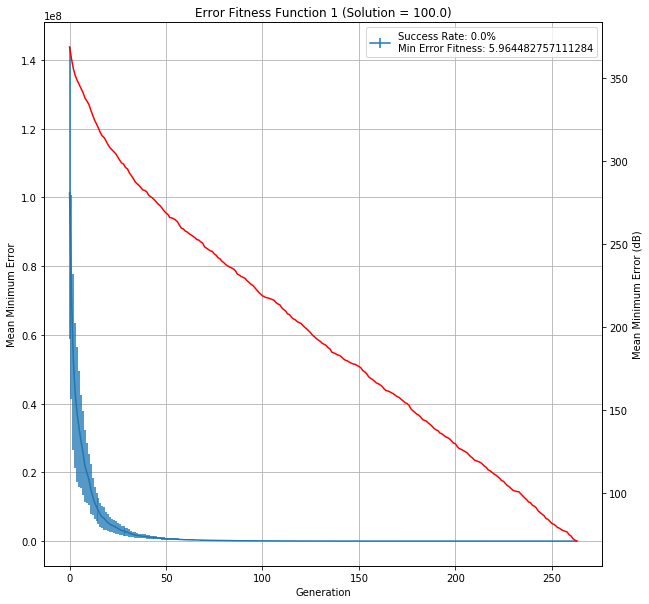

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.8_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.8,44.899306,75.380707,40.729999,33.754168,17.450009,13.10579,...,33.511512,27.503833,15.410704,26.345174,17.755785,33.379728,16.898039,35.431745,2:47:45,79800
